# Thực hiện EDA trên tập dữ liệu mua sắm tại siêu thị

---
## 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu

In [1]:
# Chuẩn bị dữ liệu cho trực quan hóa
import pandas as pd

# Đọc file CSV
data = pd.read_csv("Online Retail.csv", encoding='ISO-8859-1')

# Xem 5 dòng đầu
print("5 dòng đầu dữ liệu:")
print(data.head())

# Loại bỏ dòng bị thiếu CustomerID hoặc UnitPrice/Quantity âm
data = data.dropna(subset=['CustomerID'])
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

# Tạo biến mới: Tổng tiền = Quantity * UnitPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Gom nhóm theo quốc gia để xem tổng doanh thu theo từng nước
country_sales = data.groupby('Country', as_index=False)['TotalPrice'].sum()

# Sắp xếp giảm dần theo tổng doanh thu
country_sales_sorted = country_sales.sort_values('TotalPrice', ascending=False)

print("\nTop 5 quốc gia có doanh thu cao nhất:")
print(country_sales_sorted.head())

5 dòng đầu dữ liệu:
  ï»¿InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

     InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-10 8:26       2.55     17850.0  United Kingdom  
1  01-12-10 8:26       3.39     17850.0  United Kingdom  
2  01-12-10 8:26       2.75     17850.0  United Kingdom  
3  01-12-10 8:26       3.39     17850.0  United Kingdom  
4  01-12-10 8:26       3.39     17850.0  United Kingdom  

Top 5 quốc gia có doanh thu cao nhất:
           Country   TotalPrice
35  United Kingdom  7308391.554
23     Netherlands   285446.340
10            EIRE   265545.900
14         Ger

## 2. Trực quan hóa dữ liệu với thư viện Matplotlib

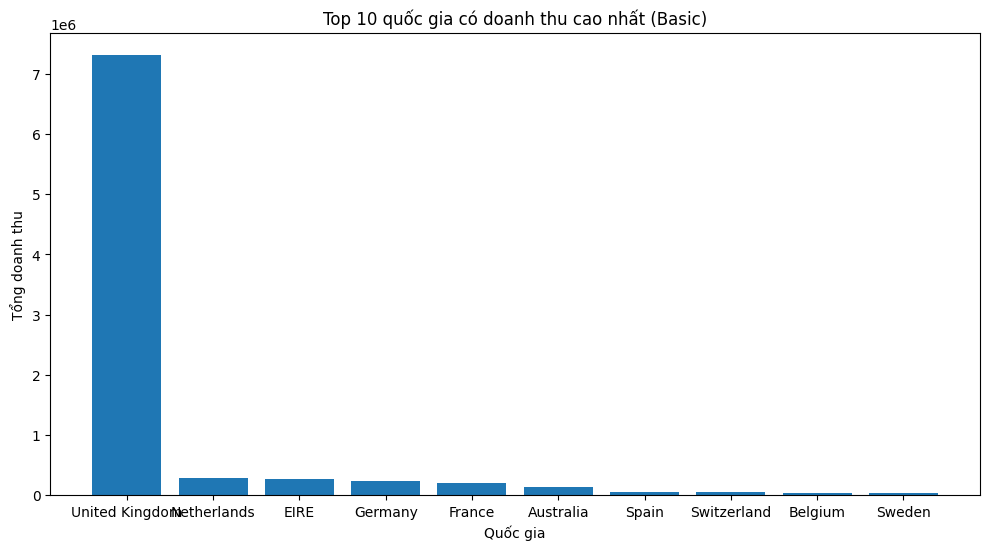

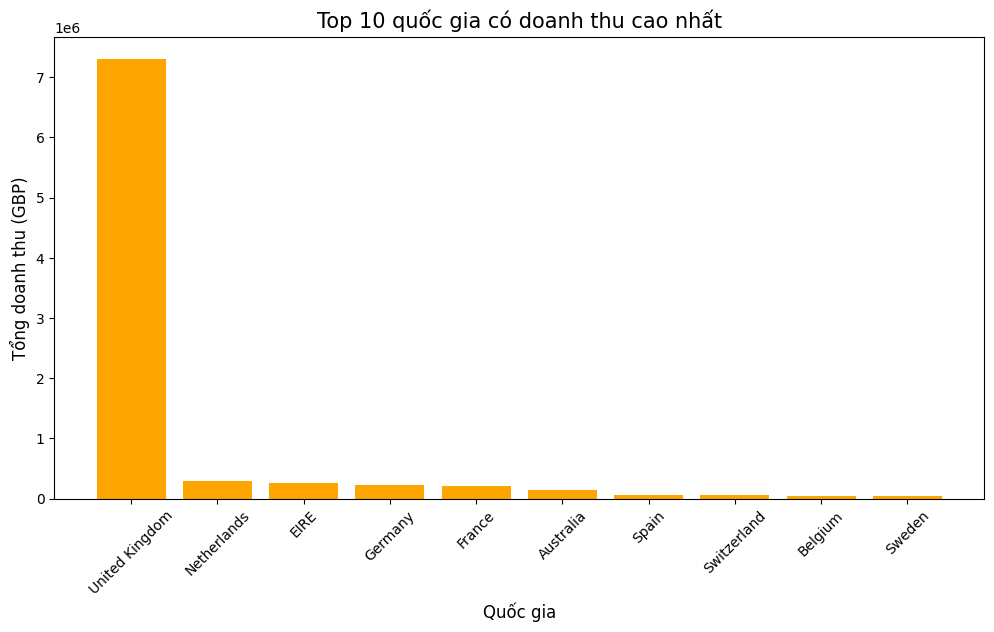

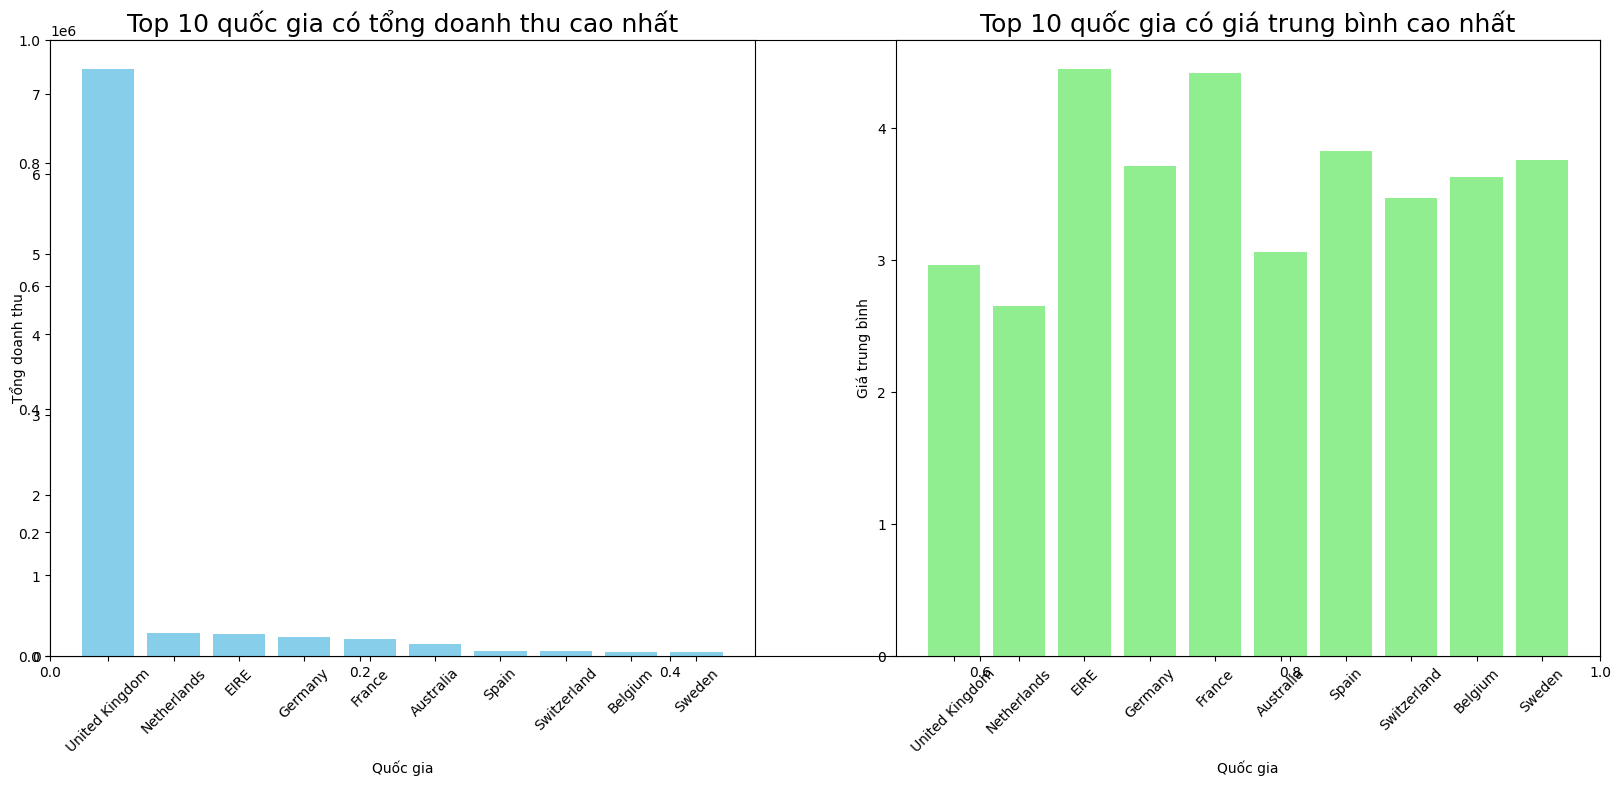

In [2]:
# Trực quan hóa dữ liệu với thư viện Matplotlib
import matplotlib.pyplot as plt

# Lấy top 10 quốc gia có doanh thu cao nhất
top10 = country_sales_sorted.head(10)

# Case 1: Basic
plt.figure(figsize=(12,6))
plt.bar(top10['Country'], top10['TotalPrice'])
plt.title('Top 10 quốc gia có doanh thu cao nhất (Basic)')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng doanh thu')
plt.show()

# Case 2: Advanced 1
plt.figure(figsize=(12,6))
plt.bar(top10['Country'], top10['TotalPrice'], color='orange')
plt.title('Top 10 quốc gia có doanh thu cao nhất', fontsize=15)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Tổng doanh thu (GBP)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Case 3: Advanced 2 (so sánh tổng và trung bình)
country_avg = data.groupby('Country', as_index=False)['UnitPrice'].mean()
merged = pd.merge(country_sales_sorted, country_avg, on='Country')
top10_merged = merged.head(10)

fig, ax = plt.subplots(figsize=(20,8))

plt.subplot(1,2,1)
plt.bar(top10_merged['Country'], top10_merged['TotalPrice'], color='skyblue')
plt.title('Top 10 quốc gia có tổng doanh thu cao nhất', fontsize=18)
plt.xlabel('Quốc gia')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(top10_merged['Country'], top10_merged['UnitPrice'], color='lightgreen')
plt.title('Top 10 quốc gia có giá trung bình cao nhất', fontsize=18)
plt.xlabel('Quốc gia')
plt.ylabel('Giá trung bình')
plt.xticks(rotation=45)
plt.show()

## 3. Trực quan hóa dữ liệu với thư viện Seaborn

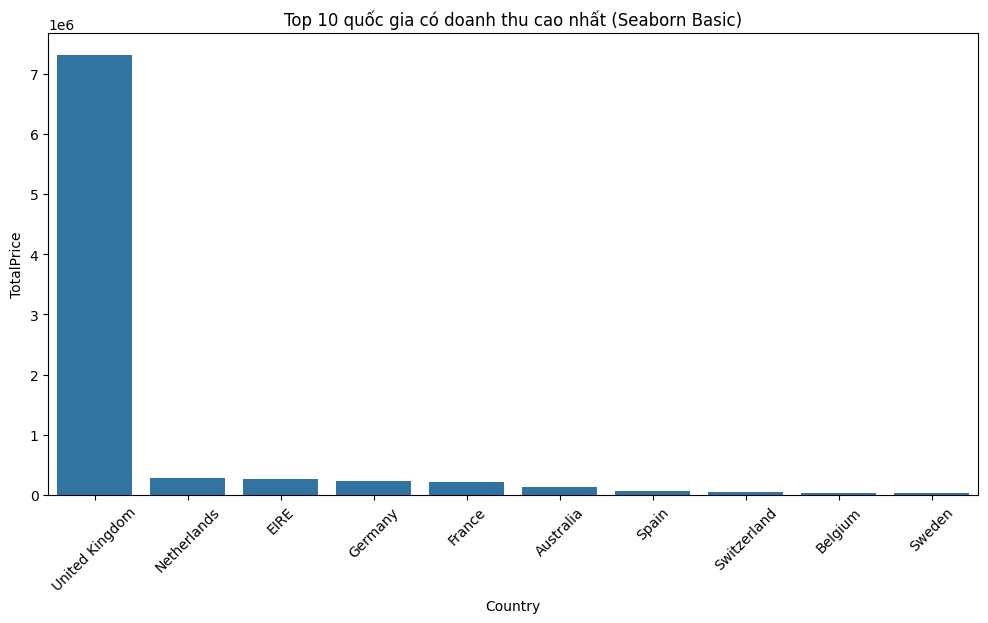

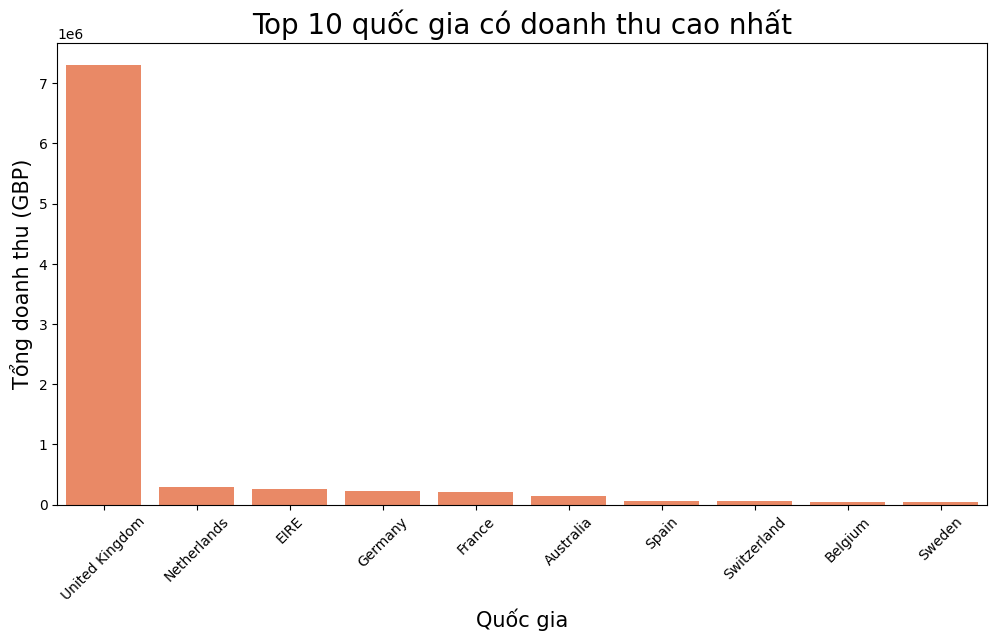

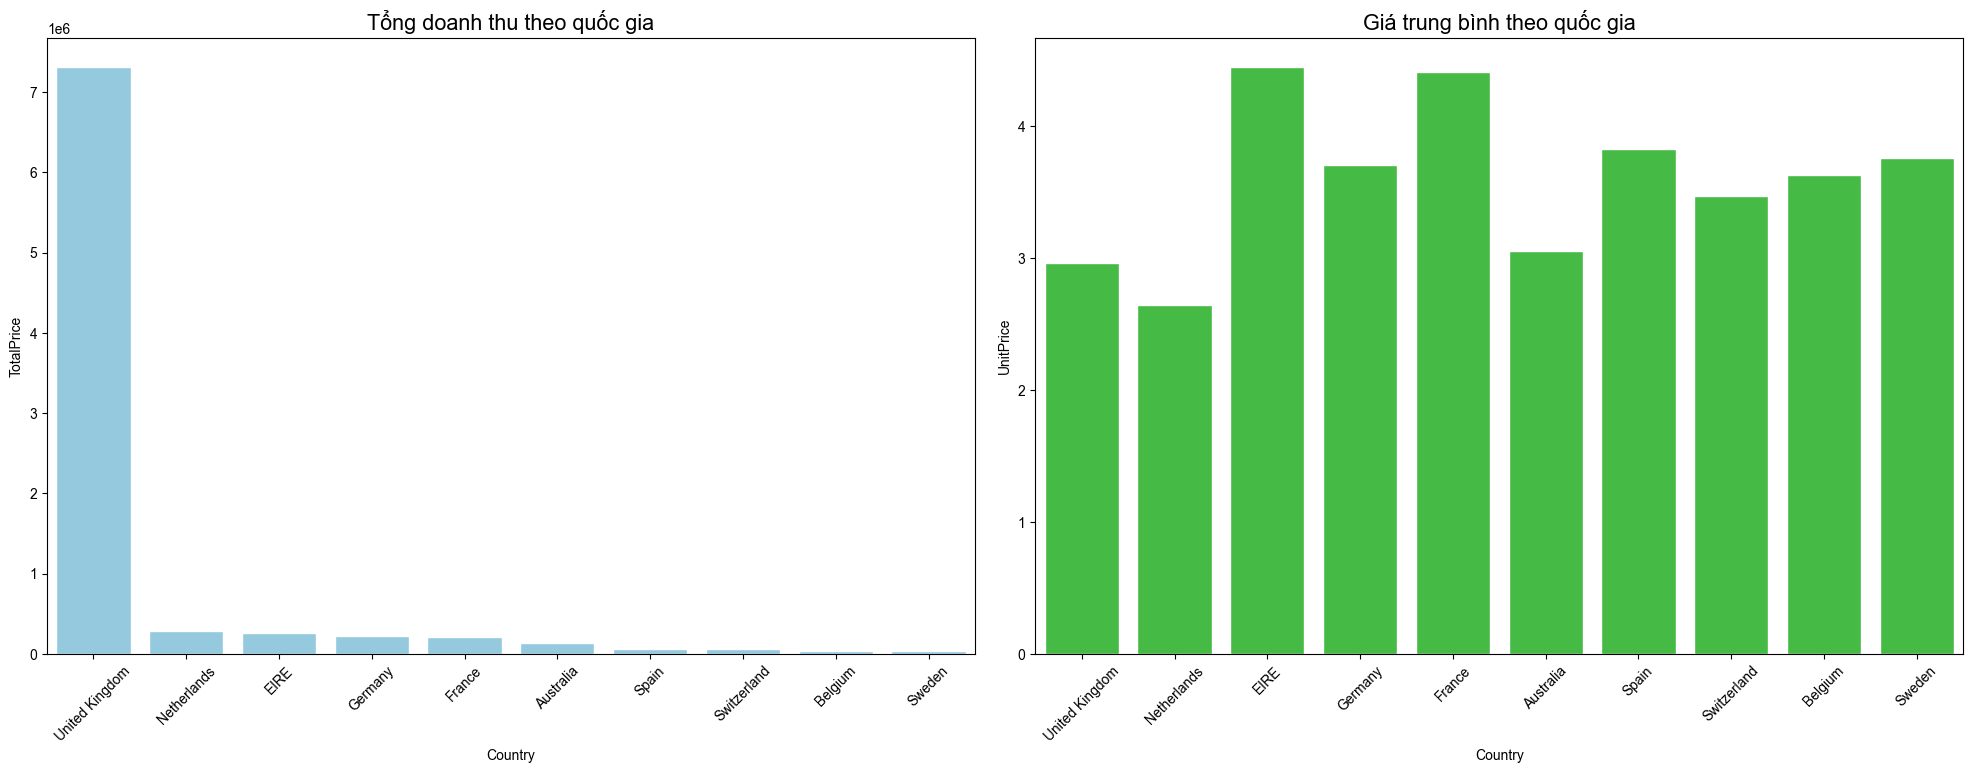

In [3]:
# Trực quan hóa dữ liệu với thư viện Seaborn
import seaborn as sns

# Case 1: Basic
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Country', y='TotalPrice')
plt.title('Top 10 quốc gia có doanh thu cao nhất (Seaborn Basic)')
plt.xticks(rotation=45)
plt.show()

# Case 2: Advanced 1
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top10, x='Country', y='TotalPrice', color='coral')
ax.set_xlabel('Quốc gia', fontsize=15)
ax.set_ylabel('Tổng doanh thu (GBP)', fontsize=15)
ax.set_title('Top 10 quốc gia có doanh thu cao nhất', fontsize=20)
plt.xticks(rotation=45)
plt.show()

# Case 3: Multiple perspectives
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.set(font_scale=1.3)

# Biểu đồ 1: Tổng doanh thu
sns.barplot(data=top10_merged, x='Country', y='TotalPrice', ax=ax[0], color='skyblue')
ax[0].set_title('Tổng doanh thu theo quốc gia')

# Biểu đồ 2: Giá trung bình
sns.barplot(data=top10_merged, x='Country', y='UnitPrice', ax=ax[1], color='limegreen')
ax[1].set_title('Giá trung bình theo quốc gia')

plt.setp(ax[0].get_xticklabels(), rotation=45)
plt.setp(ax[1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

## Kết thúc